In [1]:
!pip install opencv-python
!pip install gtts
!pip install pydot

In [2]:
import os 
os.getcwd() # current working directory

'C:\\Users\\suhas\\Desktop\\i2s'

In [3]:
import numpy as np
import pandas as pd
import cv2
from glob import glob
from pickle import dump

In [4]:
#saving all images in "images" variable
images_path = 'Images'
images = glob(images_path+'/*.jpg')
len(images)

8091

In [5]:
images[:5]

['Images\\1000268201_693b08cb0e.jpg',
 'Images\\1001773457_577c3a7d70.jpg',
 'Images\\1002674143_1b742ab4b8.jpg',
 'Images\\1003163366_44323f5815.jpg',
 'Images\\1007129816_e794419615.jpg']

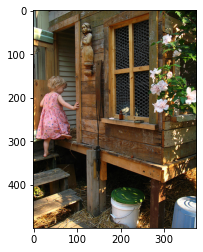

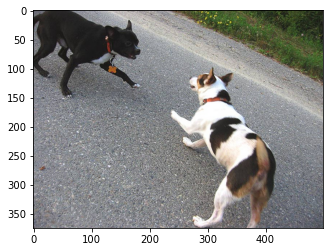

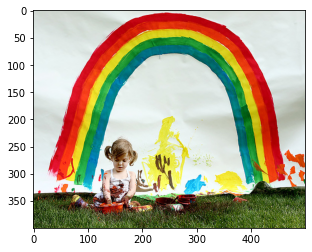

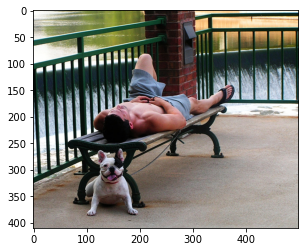

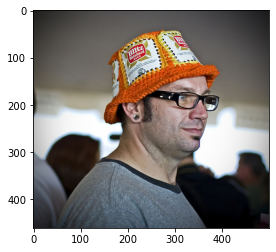

In [6]:
#printing images
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [7]:
#importing the pretarined model "resnet50"
from tensorflow.keras.applications import ResNet50
incept_model = ResNet50(include_top=True)

In [8]:
#selecting last 2nd layer of resnet50 for our feature selection model
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
# extracting features of 1500 images using resnet50 
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [10]:
print("No of images used to extract features ::",len(images_features))
print("Image Features ::::::")
images_features

No of images used to extract features :: 1500
Image Features ::::::


{'Images\\1000268201_693b08cb0e.jpg': array([0.16725852, 0.46361926, 0.00352356, ..., 0.11895251, 0.4263413 ,
        1.3225994 ], dtype=float32),
 'Images\\1001773457_577c3a7d70.jpg': array([1.4409866 , 1.043546  , 0.23661026, ..., 0.39719468, 0.04307788,
        0.30509183], dtype=float32),
 'Images\\1002674143_1b742ab4b8.jpg': array([1.5449812e+00, 9.8683006e-01, 1.1314178e-04, ..., 0.0000000e+00,
        1.1347512e+00, 4.7488478e-01], dtype=float32),
 'Images\\1003163366_44323f5815.jpg': array([0.9030611 , 0.11390921, 0.74887115, ..., 0.33106774, 0.        ,
        0.        ], dtype=float32),
 'Images\\1007129816_e794419615.jpg': array([0.33239824, 2.286729  , 0.        , ..., 0.20395713, 0.        ,
        0.25451937], dtype=float32),
 'Images\\1007320043_627395c3d8.jpg': array([1.6907164 , 0.7195159 , 0.09514083, ..., 0.        , 0.24099395,
        0.0030701 ], dtype=float32),
 'Images\\1009434119_febe49276a.jpg': array([0.40478376, 0.33644983, 0.4330247 , ..., 0.36723483, 0.

In [11]:
# save the features to file
dump(images_features, open('features.pkl', 'wb'))

In [14]:
#path for image captions
caption_path = 'Flickr8k.token.txt'

In [15]:
# saving captions in a variable "caption"
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [16]:
#example of saved captions
print("Captions ::")
captions[:10]

Captions ::


['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

In [17]:
#total Loength of captions of all the images
len(captions)

40461

In [18]:
#saving captions of those images whose features we extracted
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        for k,v in images_features.items():
            if img_name in k:
                if img_name not in captions_dict:
                    captions_dict[img_name] = [caption]  
                else:
                    captions_dict[img_name].append(caption)
            
    except:
        pass

In [19]:
# Ex: Checking the five Captions of the image.
captions_dict['1001773457_577c3a7d70.jpg']

['A black dog and a spotted dog are fighting',
 'A black dog and a tri-colored dog playing with each other on the road .',
 'A black dog and a white dog with brown spots are staring at each other in the street .',
 'Two dogs of different breeds looking at each other on the road .',
 'Two dogs on pavement moving toward each other .']

In [20]:
# Total length of dictionary
print(len(captions_dict))

1500


In [21]:
i=0
for k,v in captions_dict.items():
    if i<=5:
        print(k,v)
        i+=1
    else:
        break

1000268201_693b08cb0e.jpg ['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']
1001773457_577c3a7d70.jpg ['A black dog and a spotted dog are fighting', 'A black dog and a tri-colored dog playing with each other on the road .', 'A black dog and a white dog with brown spots are staring at each other in the street .', 'Two dogs of different breeds looking at each other on the road .', 'Two dogs on pavement moving toward each other .']
1002674143_1b742ab4b8.jpg ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .', 'A little girl is sitting in front of a large painted rainbow .', 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .', 'There is a girl with pigtails sitting

In [22]:
import string

# prepare translation table for removing punctuation
table = str.maketrans('', '', string.punctuation)
for key, desc_list in captions_dict.items():
	for i in range(len(desc_list)):
		desc = desc_list[i]
		# tokenize
		desc = desc.split()
		# convert to lower case
		desc = [word.lower() for word in desc]
		# remove punctuation from each token
		desc = [w.translate(table) for w in desc]
		# remove hanging 's' and 'a'
		desc = [word for word in desc if len(word)>1]
		# remove tokens with numbers in them
		desc = [word for word in desc if word.isalpha()]
		# store as string
		desc_list[i] =  ' '.join(desc)

In [23]:
i=0
for k,v in captions_dict.items():
    if i<=5:
        print(k,v)
        i+=1
    else:
        break

1000268201_693b08cb0e.jpg ['child in pink dress is climbing up set of stairs in an entry way', 'girl going into wooden building', 'little girl climbing into wooden playhouse', 'little girl climbing the stairs to her playhouse', 'little girl in pink dress going into wooden cabin']
1001773457_577c3a7d70.jpg ['black dog and spotted dog are fighting', 'black dog and tricolored dog playing with each other on the road', 'black dog and white dog with brown spots are staring at each other in the street', 'two dogs of different breeds looking at each other on the road', 'two dogs on pavement moving toward each other']
1002674143_1b742ab4b8.jpg ['little girl covered in paint sits in front of painted rainbow with her hands in bowl', 'little girl is sitting in front of large painted rainbow', 'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it', 'there is girl with pigtails sitting in front of rainbow painting', 'young girl with pigtails painting outside in

In [24]:
clean_caps = captions_dict.copy

In [25]:
#saving the clean discriptions
lines = list()
for key, desc_list in captions_dict.items():
	for desc in desc_list:
		lines.append(key + ' ' + desc)
data = '\n'.join(lines)
file = open('clean_descriptions.txt', 'w')
file.write(data)
file.close()

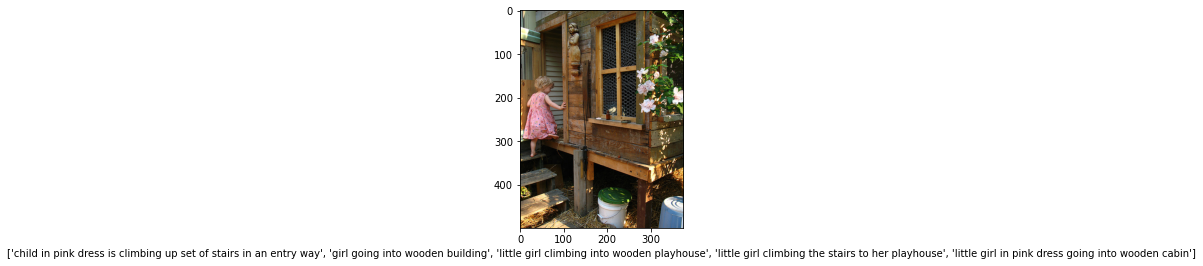

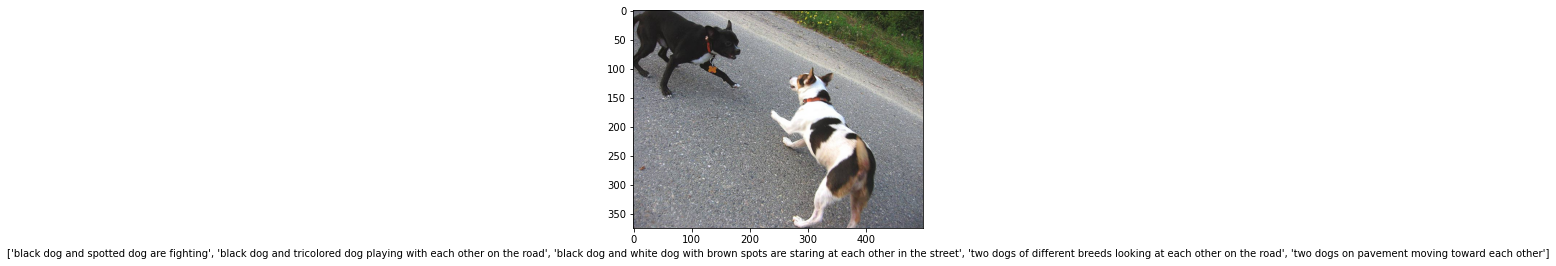

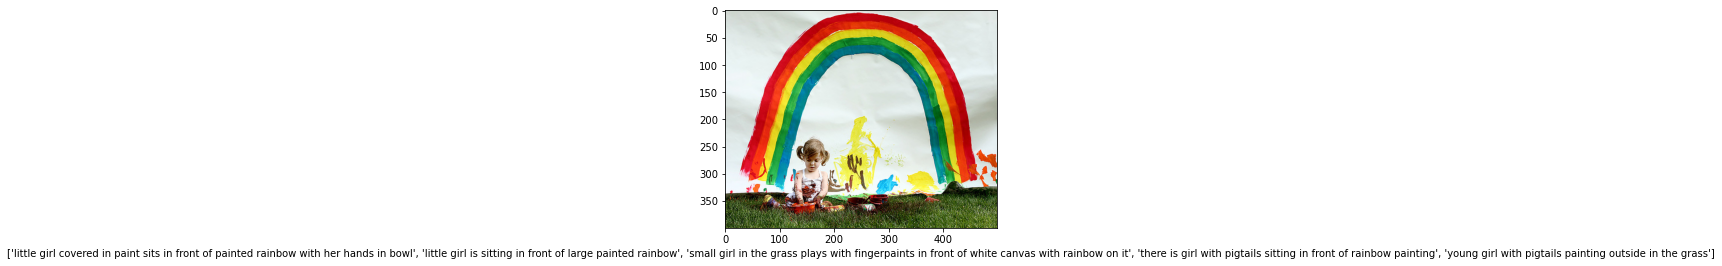

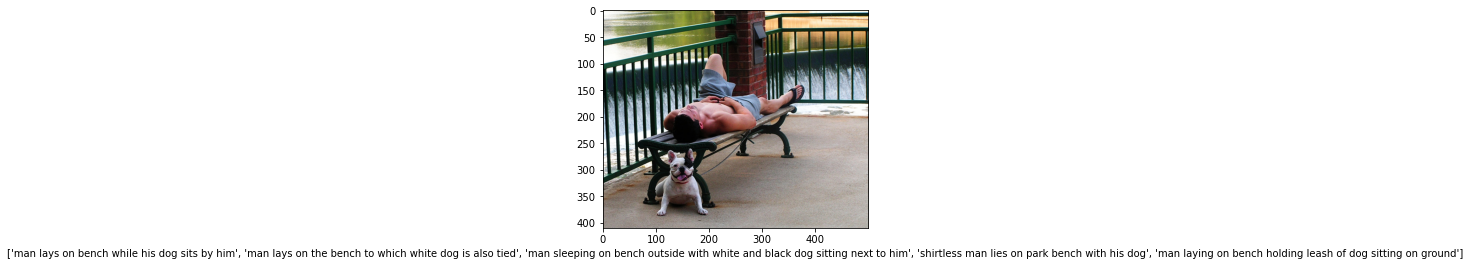

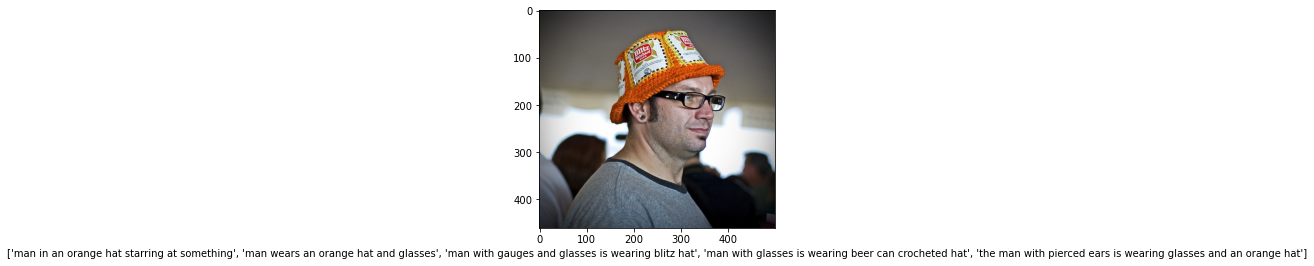

In [26]:
#printing images with their respective captions
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2=images[i][7:]
    plt.xlabel(captions_dict[img2])
    plt.imshow(img)

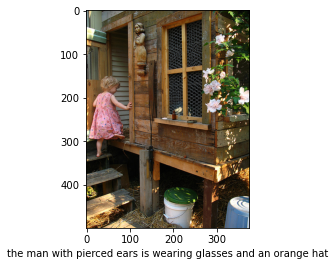

In [27]:
# no need of this code
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    img_name = k
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2=images[i][7:]
    plt.xlabel(captions_dict[img2][-1])
    plt.imshow(img)
    break

In [28]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word] = 1
            else:
                count_words[word] += 1

In [29]:
len(count_words)
word_count=count_words.copy()
word_count

{'child': 339,
 'in': 3469,
 'pink': 154,
 'dress': 62,
 'is': 1801,
 'climbing': 152,
 'up': 282,
 'set': 16,
 'of': 1225,
 'stairs': 14,
 'an': 455,
 'entry': 1,
 'way': 21,
 'girl': 711,
 'going': 24,
 'into': 258,
 'wooden': 58,
 'building': 69,
 'little': 418,
 'playhouse': 2,
 'the': 3460,
 'to': 656,
 'her': 239,
 'cabin': 2,
 'black': 749,
 'dog': 1708,
 'and': 1649,
 'spotted': 8,
 'are': 581,
 'fighting': 18,
 'tricolored': 6,
 'playing': 366,
 'with': 1498,
 'each': 76,
 'other': 138,
 'on': 2056,
 'road': 79,
 'white': 675,
 'brown': 510,
 'spots': 5,
 'staring': 11,
 'at': 582,
 'street': 162,
 'two': 1006,
 'dogs': 429,
 'different': 7,
 'breeds': 4,
 'looking': 163,
 'pavement': 10,
 'moving': 7,
 'toward': 23,
 'covered': 73,
 'paint': 4,
 'sits': 130,
 'front': 262,
 'painted': 14,
 'rainbow': 7,
 'hands': 47,
 'bowl': 4,
 'sitting': 250,
 'large': 241,
 'small': 278,
 'grass': 318,
 'plays': 117,
 'fingerpaints': 1,
 'canvas': 4,
 'it': 81,
 'there': 60,
 'pigtails': 

In [30]:
count = list(word_count.values())
words= list(word_count.keys())

In [31]:
df=pd.DataFrame(list(zip(words,count)), columns=('words','count'))
df

words  count
0           child    339
1              in   3469
2            pink    154
3           dress     62
4              is   1801
...           ...    ...
3941        whild      1
3942       flight      1
3943        sails      1
3944  rectangular      1
3945         sell      1

[3946 rows x 2 columns]

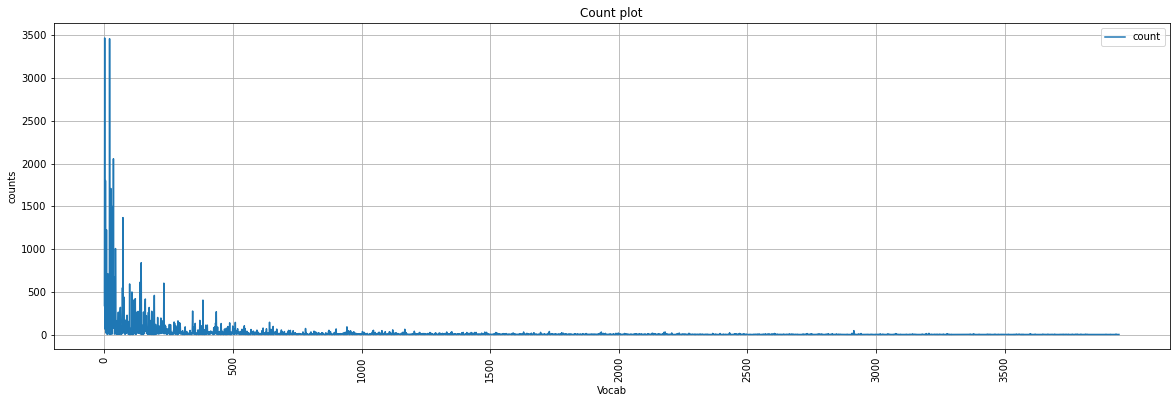

In [32]:
#words with a frequency of more than 10.
df.plot(grid=True,figsize=(20,6))
plt.title('Count plot')
plt.xlabel('Vocab')
plt.xticks(np.arange(0,4000,500),rotation=90)
plt.ylabel('counts')
plt.show()

Text(0.5, 1.0, 'plot of count vs words')

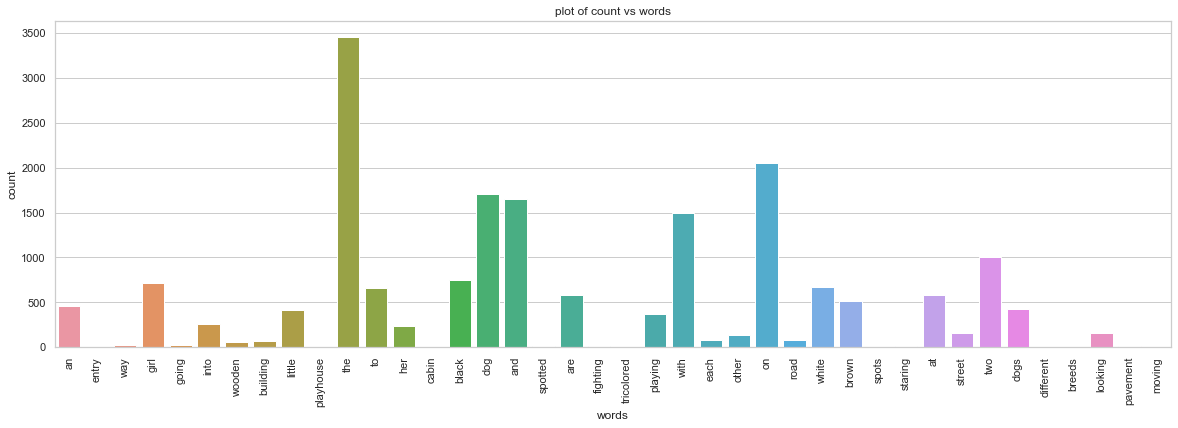

In [33]:
#The distribution of top 50 words
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(20,6))
sns.barplot(x='words',y='count',data=df[10:50])
plt.xticks(rotation='vertical')
plt.title('plot of count vs words')

Text(0.5, 1.0, 'plot of count vs words')

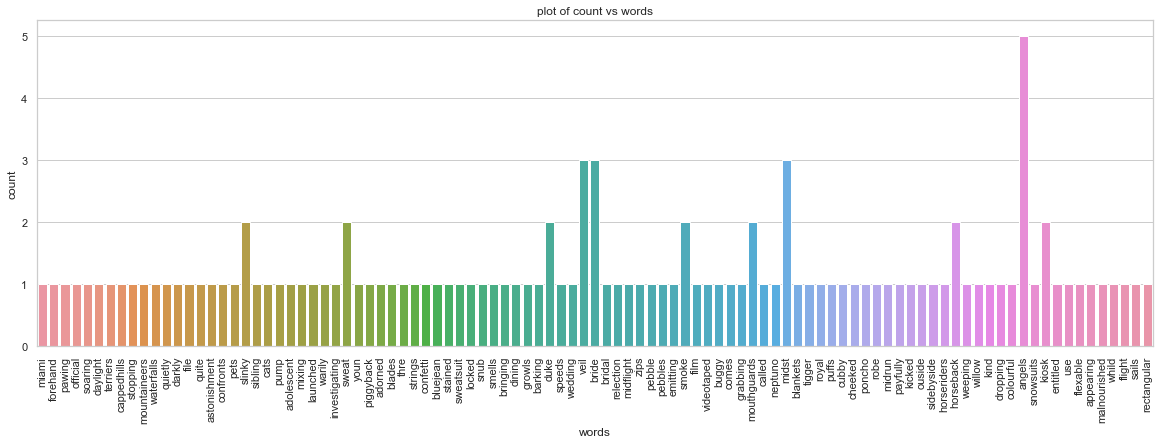

In [34]:
#the distribution of the least frequent word we removed earlier
sns.set(style='whitegrid')
plt.figure(figsize=(20,6))
sns.barplot(x='words',y='count',data=df[-100:-1])
plt.xticks(rotation='vertical')
plt.title('plot of count vs words')

In [35]:
# addind startseq and endseq

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)
captions_dict['1003163366_44323f5815.jpg']

['startofseq man lays on bench while his dog sits by him endofseq',
 'startofseq man lays on the bench to which white dog is also tied endofseq',
 'startofseq man sleeping on bench outside with white and black dog sitting next to him endofseq',
 'startofseq shirtless man lies on park bench with his dog endofseq',
 'startofseq man laying on bench holding leash of dog sitting on ground endofseq']

In [37]:
count_words = {} # spliting each word in caption and counting same in whole caption lists
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split(): #spliting the captions into words to get vocabulory.
            if word not in count_words: 

                count_words[word] = 0

            else:
                count_words[word] += 1

In [38]:
len(count_words),count_words

(3948,
 {'startofseq': 7499,
  'child': 338,
  'in': 3468,
  'pink': 153,
  'dress': 61,
  'is': 1800,
  'climbing': 151,
  'up': 281,
  'set': 15,
  'of': 1224,
  'stairs': 13,
  'an': 454,
  'entry': 0,
  'way': 20,
  'endofseq': 7499,
  'girl': 710,
  'going': 23,
  'into': 257,
  'wooden': 57,
  'building': 68,
  'little': 417,
  'playhouse': 1,
  'the': 3459,
  'to': 655,
  'her': 238,
  'cabin': 1,
  'black': 748,
  'dog': 1707,
  'and': 1648,
  'spotted': 7,
  'are': 580,
  'fighting': 17,
  'tricolored': 5,
  'playing': 365,
  'with': 1497,
  'each': 75,
  'other': 137,
  'on': 2055,
  'road': 78,
  'white': 674,
  'brown': 509,
  'spots': 4,
  'staring': 10,
  'at': 581,
  'street': 161,
  'two': 1005,
  'dogs': 428,
  'different': 6,
  'breeds': 3,
  'looking': 162,
  'pavement': 9,
  'moving': 6,
  'toward': 22,
  'covered': 72,
  'paint': 3,
  'sits': 129,
  'front': 261,
  'painted': 13,
  'rainbow': 6,
  'hands': 46,
  'bowl': 3,
  'sitting': 249,
  'large': 240,
  'small

In [39]:
#creating a key value pair (key=word, value=no of times it appeard)
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [40]:
print(len(new_dict))
new_dict

3948


{'startofseq': 1,
 'child': 2,
 'in': 3,
 'pink': 4,
 'dress': 5,
 'is': 6,
 'climbing': 7,
 'up': 8,
 'set': 9,
 'of': 10,
 'stairs': 11,
 'an': 12,
 'entry': 13,
 'way': 14,
 'endofseq': 15,
 'girl': 16,
 'going': 17,
 'into': 18,
 'wooden': 19,
 'building': 20,
 'little': 21,
 'playhouse': 22,
 'the': 23,
 'to': 24,
 'her': 25,
 'cabin': 26,
 'black': 27,
 'dog': 28,
 'and': 29,
 'spotted': 30,
 'are': 31,
 'fighting': 32,
 'tricolored': 33,
 'playing': 34,
 'with': 35,
 'each': 36,
 'other': 37,
 'on': 38,
 'road': 39,
 'white': 40,
 'brown': 41,
 'spots': 42,
 'staring': 43,
 'at': 44,
 'street': 45,
 'two': 46,
 'dogs': 47,
 'different': 48,
 'breeds': 49,
 'looking': 50,
 'pavement': 51,
 'moving': 52,
 'toward': 53,
 'covered': 54,
 'paint': 55,
 'sits': 56,
 'front': 57,
 'painted': 58,
 'rainbow': 59,
 'hands': 60,
 'bowl': 61,
 'sitting': 62,
 'large': 63,
 'small': 64,
 'grass': 65,
 'plays': 66,
 'fingerpaints': 67,
 'canvas': 68,
 'it': 69,
 'there': 70,
 'pigtails': 71,


In [41]:
new_dict['<OUT>'] = len(new_dict) 

In [42]:
len(new_dict)

3949

In [43]:
captions_backup = captions_dict.copy()

In [44]:
captions_dict = captions_backup.copy()

In [45]:
captions_backup

{'1000268201_693b08cb0e.jpg': ['startofseq child in pink dress is climbing up set of stairs in an entry way endofseq',
  'startofseq girl going into wooden building endofseq',
  'startofseq little girl climbing into wooden playhouse endofseq',
  'startofseq little girl climbing the stairs to her playhouse endofseq',
  'startofseq little girl in pink dress going into wooden cabin endofseq'],
 '1001773457_577c3a7d70.jpg': ['startofseq black dog and spotted dog are fighting endofseq',
  'startofseq black dog and tricolored dog playing with each other on the road endofseq',
  'startofseq black dog and white dog with brown spots are staring at each other in the street endofseq',
  'startofseq two dogs of different breeds looking at each other on the road endofseq',
  'startofseq two dogs on pavement moving toward each other endofseq'],
 '1002674143_1b742ab4b8.jpg': ['startofseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endofseq',
  'startofseq litt

In [46]:
#encoding the captions
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])

        captions_dict[k][vv.index(v)] = encoded

In [47]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   3,
   12,
   13,
   14,
   15],
  [1, 16, 17, 18, 19, 20, 15],
  [1, 21, 16, 7, 18, 19, 22, 15],
  [1, 21, 16, 7, 23, 11, 24, 25, 22, 15],
  [1, 21, 16, 3, 4, 5, 17, 18, 19, 26, 15]],
 '1001773457_577c3a7d70.jpg': [[1, 27, 28, 29, 30, 28, 31, 32, 15],
  [1, 27, 28, 29, 33, 28, 34, 35, 36, 37, 38, 23, 39, 15],
  [1, 27, 28, 29, 40, 28, 35, 41, 42, 31, 43, 44, 36, 37, 3, 23, 45, 15],
  [1, 46, 47, 10, 48, 49, 50, 44, 36, 37, 38, 23, 39, 15],
  [1, 46, 47, 38, 51, 52, 53, 36, 37, 15]],
 '1002674143_1b742ab4b8.jpg': [[1,
   21,
   16,
   54,
   3,
   55,
   56,
   3,
   57,
   10,
   58,
   59,
   35,
   25,
   60,
   3,
   61,
   15],
  [1, 21, 16, 6, 62, 3, 57, 10, 63, 58, 59, 15],
  [1, 64, 16, 3, 23, 65, 66, 35, 67, 3, 57, 10, 40, 68, 35, 59, 38, 69, 15],
  [1, 70, 6, 16, 35, 71, 62, 3, 57, 10, 59, 72, 15],
  [1, 73, 16, 35, 71, 72, 74, 3, 23, 65, 15]],
 '1003163366_44323f5815.jpg': [[1,

In [48]:
# finding maximum lenth of caption
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)
            
print("maximum length of the caption :: ",MAX_LEN)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 3, 12, 13, 14, 15]
[1, 27, 28, 29, 40, 28, 35, 41, 42, 31, 43, 44, 36, 37, 3, 23, 45, 15]
[1, 64, 16, 3, 23, 65, 66, 35, 67, 3, 57, 10, 40, 68, 35, 59, 38, 69, 15]
[1, 160, 146, 3, 40, 161, 29, 162, 163, 3, 57, 10, 164, 149, 35, 75, 3, 151, 159, 81, 15]
[1, 75, 6, 91, 23, 244, 10, 234, 8, 24, 79, 223, 3, 57, 10, 397, 337, 78, 185, 75, 189, 38, 15]
[1, 75, 3, 141, 561, 21, 146, 8, 3, 23, 227, 29, 585, 192, 81, 24, 586, 386, 587, 295, 104, 216, 81, 15]
[1, 23, 16, 3, 23, 652, 582, 653, 6, 142, 86, 24, 46, 73, 197, 144, 6, 101, 27, 654, 29, 23, 37, 6, 655, 656, 15]
[1, 70, 31, 346, 73, 197, 144, 557, 896, 91, 897, 898, 144, 35, 132, 899, 876, 29, 841, 3, 25, 223, 29, 144, 35, 900, 470, 15]
[1, 16, 3, 110, 29, 27, 1472, 35, 40, 1255, 6, 142, 86, 24, 75, 3, 882, 29, 16, 3, 542, 4, 29, 27, 29, 40, 1473, 654, 15]
[1, 234, 3, 12, 94, 691, 29, 163, 6, 1428, 38, 164, 149, 78, 469, 234, 3, 110, 289, 138, 86, 24, 25, 38, 23, 149, 1964, 25, 1438, 1439, 15]
maximu

In [49]:
#padding and categorising the captions 
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    photo1=photo
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                print(k)
                a=photo['Images\\'+k]
                X.append(a)
            
                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

def generator1(photo, caption):
    n_samples = 0
    photo1=photo
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                print(k)
                a=photo['Images\\'+k]
                X.append(a)
            
                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

test_data = dict(list(images_features.items())[:1200]) #{k[:1000] images_features[k] for k in images_features}
test_data_cap = dict(list(captions_dict.items())[:1200])

val_data = dict(list(images_features.items())[1200:1500]) #{k[:1000] images_features[k] for k in images_features}
val_data_cap = dict(list(captions_dict.items())[1200:1500])

X, y_in, y_out = generator(test_data, test_data_cap)
X_val, y_in_val, y_out_val =  generator(val_data, val_data_cap)

1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_6

1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1026685415_0431cbf574.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7e8df9a2ea.jpg
1028205764_7

1056338697_4f7d7ce270.jpg
1056338697_4f7d7ce270.jpg
1056338697_4f7d7ce270.jpg
1056338697_4f7d7ce270.jpg
1056338697_4f7d7ce270.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_662cee0814.jpg
1056359656_6

1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084040636_97d9633581.jpg
1084104085_3b06223afe.jpg
1084104085_3b06223afe.jpg
1084104085_3b06223afe.jpg
1084104085_3b06223afe.jpg
1084104085_3b06223afe.jpg
1084104085_3b06223afe.jpg
1084104085_3b06223afe.jpg
1084104085_3

109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg
109738763_90541ef30d.jpg


1119015538_e8e796281e.jpg
1119015538_e8e796281e.jpg
1119015538_e8e796281e.jpg
1119015538_e8e796281e.jpg
1119015538_e8e796281e.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_58e4b93eac.jpg
1119418776_5

114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
114051287_dd85625a04.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.jpg
1141718391_24164bf1b1.j

1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1164765687_7aca07bbe7.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e466f1e80a.jpg
1167662968_e

1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c

1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1236964638_1808784a3c.jpg
1237985362_dbafc59280.jpg
1237985362_dbafc59280.jpg
1237985362_dbafc59280.jpg
1237985362_dbafc59280.jpg
1237985362_dbafc59280.jpg
1237985362_dbafc59280.jpg
1237985362_dbafc59280.jpg
1237985362_d

125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
125319704_49ead3463c.jpg
1253264731_e7c689eca5.jpg
1253264731_e7c689eca5.jpg
1253264731_e7c689eca5.jpg
1253264731_e7c689eca5.jpg
1253264731_e7c689eca5.jpg
1253264731_e7c689eca

127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127488876_f2d2a89588.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg
127490019_7c5c08cb11.jpg


1290894194_8a4ffdc7eb.jpg
1290894194_8a4ffdc7eb.jpg
1290894194_8a4ffdc7eb.jpg
1290894194_8a4ffdc7eb.jpg
1290894194_8a4ffdc7eb.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2ad02fea91.jpg
1294578091_2

1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304100320_c8990a1539.jpg
1304961697_76b86b0c18.jpg
1304961697_7

1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_77b77b4617.jpg
1321949151_7

133905560_9d012b47f3.jpg
133905560_9d012b47f3.jpg
133905560_9d012b47f3.jpg
133905560_9d012b47f3.jpg
133905560_9d012b47f3.jpg
133905560_9d012b47f3.jpg
133905560_9d012b47f3.jpg
133905560_9d012b47f3.jpg
133905560_9d012b47f3.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841.jpg
1339596997_8ac29c1841

135235570_5698072cd4.jpg
135235570_5698072cd4.jpg
135235570_5698072cd4.jpg
135235570_5698072cd4.jpg
135235570_5698072cd4.jpg
135235570_5698072cd4.jpg
135235570_5698072cd4.jpg
135235570_5698072cd4.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce9.jpg
1352398363_9cc8ffcce

1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
1363924449_487f0733df.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
136552115_6dc3e7231c.jpg
13655

1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387461595_2fe6925f73.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_cee67735f5.jpg
1387785218_c

1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e798697b93.jpg
1397887419_e

1408958345_68eea9a4e4.jpg
1408958345_68eea9a4e4.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_13fff6c875.jpg
1410193619_1

1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060020_7a6984e2ea.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_a

1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_71bbaa094a.jpg
1430154945_7

1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_129212c988.jpg
1440024115_1

1459250022_bf1eddad11.jpg
1459250022_bf1eddad11.jpg
1459250022_bf1eddad11.jpg
1459250022_bf1eddad11.jpg
1459250022_bf1eddad11.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d64fb633e0.jpg
1460352062_d

1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f001988691.jpg
1468429623_f

1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a7163bf899.jpg
1478606153_a

1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8

1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523800748_a59e980eee.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_edd68464da.jpg
1523984678_e

155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
155221027_b23a4331b7.jpg
1554713437_61b64527dd.jpg
1554713437_61b64527dd.jpg
1554713437_61b64527dd.jpg
1554713437_61b64527dd.jpg
1554713437_61b64527dd.jpg
1554713437_61b64527dd.jpg
1554713437_61b64527dd.jpg
1554713437_61b6452

1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1579198375_8

1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
1616016569_673de1d678.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.jpg
161669933_3e7d8c7e2c.

166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
166654939_80ea4ddbcc.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.jpg
1670592963_39731a3dac.

1713248047_d03721456d.jpg
1713248047_d03721456d.jpg
1713248047_d03721456d.jpg
1713248047_d03721456d.jpg
1713248047_d03721456d.jpg
1713248047_d03721456d.jpg
1713248047_d03721456d.jpg
1713248047_d03721456d.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d860df4e10.jpg
1713248099_d

1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0

1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
179829865_095b040377.jpg
179829865_095

1809758121_96026913bb.jpg
1809758121_96026913bb.jpg
1809758121_96026913bb.jpg
1809758121_96026913bb.jpg
1809758121_96026913bb.jpg
1809758121_96026913bb.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a2dac6c26b.jpg
1809796012_a

185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
1858963639_4588cd4be9.jpg
1858963639_4588cd4be9.jp

189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
189740668_0b045f1ff2.jpg
1904112245_549e47c8aa.jpg
1904112245_549e47c8aa.jpg
1904112245_549e47c8aa.jpg
1904112245_549e47c8aa.jpg
1904112245_549e47c8aa.jpg
1904112245_549e47c8aa.jpg
1904112245_549e47c8

1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1932314876_9cc46fd054.jpg
1936215201_d03a75cbba.jpg
1936215201_d

1975531316_8b00eeaaf7.jpg
1975531316_8b00eeaaf7.jpg
1975531316_8b00eeaaf7.jpg
1975531316_8b00eeaaf7.jpg
1975531316_8b00eeaaf7.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4e13d7e19f.jpg
1977827746_4

2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2017276266_566656c59d.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_0

2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a

2056377805_e9a9b3bcf0.jpg
2056377805_e9a9b3bcf0.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jp

2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1529f.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_2

2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
2072574835_febf0c5fb9.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
207275121_ee4dfa0bf2.jpg
2072751

2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_ad1370a646.jpg
2079110798_a

2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a

2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090339522_d30d2436f9.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b

2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_77a154f5b9.jpg
2097403787_7

2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102724238_3cf921d7bb.jpg
2102732029_9ae520914d.jpg
2102732029_9ae520914d.jpg
2102732029_9ae520914d.jpg
2102732029_9ae520914d.jpg
2102732029_9ae520914d.jpg
2102732029_9ae520914d.jpg
2102732029_9ae520914d.jpg
2102732029_9ae520914d.jpg
2102732029_9ae520914d.jpg
2102732029_9

2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5bc6a90e42.jpg
2113530024_5

2124040721_bffc0a091a.jpg
2124040721_bffc0a091a.jpg
2124040721_bffc0a091a.jpg
2124040721_bffc0a091a.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5b265a2fbc.jpg
2125216241_5

2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2136992638_098d62a3c5.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1

2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9ae6a9b1c7.jpg
2148695079_9

2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2161799386_27aa938421.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_ff777edc95.jpg
2162469360_f

2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2173677067_9d0732bcc2.jpg
2174206711_11cb712a8d.jpg
2174206711_11cb712a8d.jpg
2174206711_11cb712a8d.jpg
2174206711_1

218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273_d182e18cf6.jpg
2183967273

2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192131110_8a40e7c028.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2a0cbe849d.jpg
2192333873_2

2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3b2d63f01f.jpg
2196316998_3

2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e51d0f9065.jpg
2203449950_e

2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d

2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_3

2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_6

2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2238759450_6475641bdb.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_43c73c887c.jpg
2239938351_4

224702241_05af393148.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg
224702242_a62aaa6dff.jpg


2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_03fefc25af.jpg
2252264255_0

2257798999_d9d1b9a45a.jpg
2257798999_d9d1b9a45a.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2797d0eca8.jpg
2258662398_2

2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
2266061169_dfbf8f0595.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
226607225_44d696db6b.jpg
2266

2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271671533_7538ccd556.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e1b1ec8442.jpg
2271755053_e

2275253272_00f941366e.jpg
2275253272_00f941366e.jpg
2275253272_00f941366e.jpg
2275253272_00f941366e.jpg
2275253272_00f941366e.jpg
2275253272_00f941366e.jpg
2275253272_00f941366e.jpg
2275253272_00f941366e.jpg
2275253272_00f941366e.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_0

2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282260240_55387258de.jpg
2282522980_45cfa8e0cf.jpg
2282522980_45cfa8e0cf.jpg
2282522980_45cfa8e0cf.jpg
2282522980_45cfa8e0cf.jpg
2282522980_4

2288315705_5f4c37d932.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4ebcee2174.jpg
2288530008_4

2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3419605c16.jpg
2297471897_3

2302516347_26054442f9.jpg
2302516347_26054442f9.jpg
2302516347_26054442f9.jpg
2302516347_26054442f9.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_aa0300eb68.jpg
2302747917_a

In [50]:
len(X), len(y_in), len(y_out), len(X_val), len(y_in_val), len(y_out_val)

(62089, 62089, 62089, 15249, 15249, 15249)

In [51]:
#converting them into arrayto give them to model
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

#converting them into arrayto give them to model
X_val = np.array(X)
y_in_val = np.array(y_in, dtype='float64')
y_out_val = np.array(y_out, dtype='float64')

In [52]:
X.shape, y_in.shape, y_out.shape, X_val.shape, y_in_val.shape, y_out_val.shape

((62089, 2048),
 (62089, 31),
 (62089, 3949),
 (62089, 2048),
 (62089, 31),
 (62089, 3949))

In [53]:
X[992], X_val[1321]

(array([1.1065009 , 1.0390247 , 0.11404588, ..., 1.7250015 , 1.1145633 ,
        0.1719754 ], dtype=float32),
 array([0.47099417, 0.62006384, 0.2810979 , ..., 0.2746202 , 0.6665897 ,
        1.6057591 ], dtype=float32))

In [54]:
y_in[2], y_in_val[1356]

(array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  1.,  23., 312., 264., 230., 313., 314.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]))

In [86]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.models import load_model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               262272    
                                                                 
 repeat_vector_2 (RepeatVect  (None, 31, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 31, 128)           505472    
                                                                 
 lstm_8 (LSTM)               (None, 31, 256)           394240    
                          

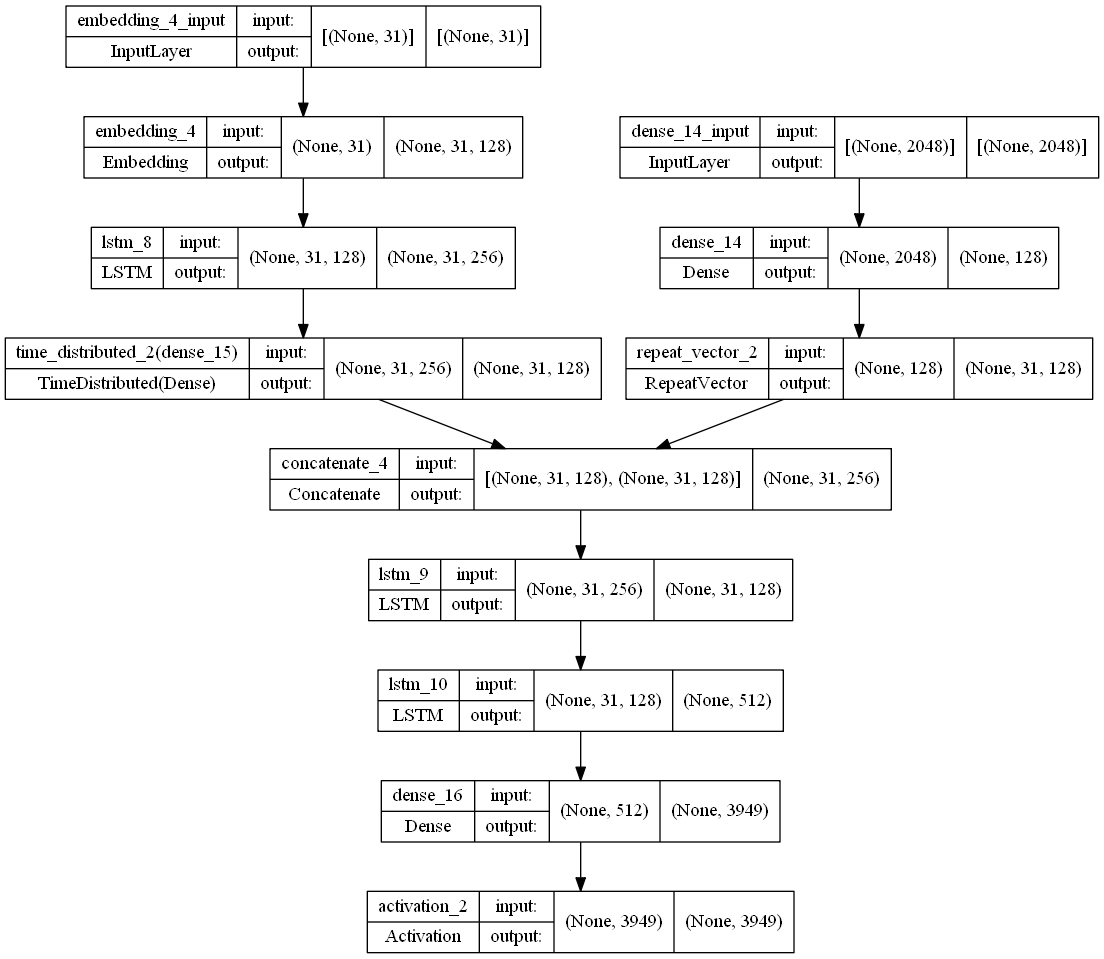

In [88]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

#model.load_weights("../input/model_weights.h5")
#opt = RMSprop(learning_rate=0.02)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model.png', show_shapes=True)

In [62]:
training=model.fit([X, y_in], y_out, batch_size=512,validation_data=([X_val, y_in_val], y_out_val), epochs=2, verbose = 2)

Epoch 1/2
122/122 - 274s - loss: 4.9730 - accuracy: 0.1536 - val_loss: 4.9123 - val_accuracy: 0.1507 - 274s/epoch - 2s/step
Epoch 2/2
122/122 - 275s - loss: 4.8527 - accuracy: 0.1602 - val_loss: 4.7489 - val_accuracy: 0.1694 - 275s/epoch - 2s/step


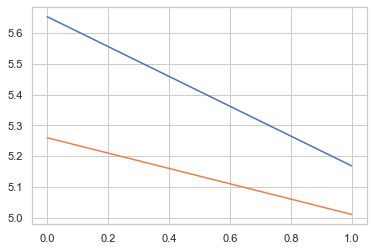

In [59]:
import matplotlib.pyplot as plt
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

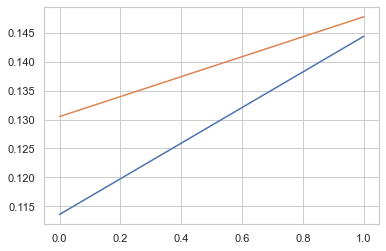

In [60]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               262272    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
Total params: 295,296
Trainable params: 295,296
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 31, 256)           1010944   
                                                                 
 dropout_5 (Dropout)    

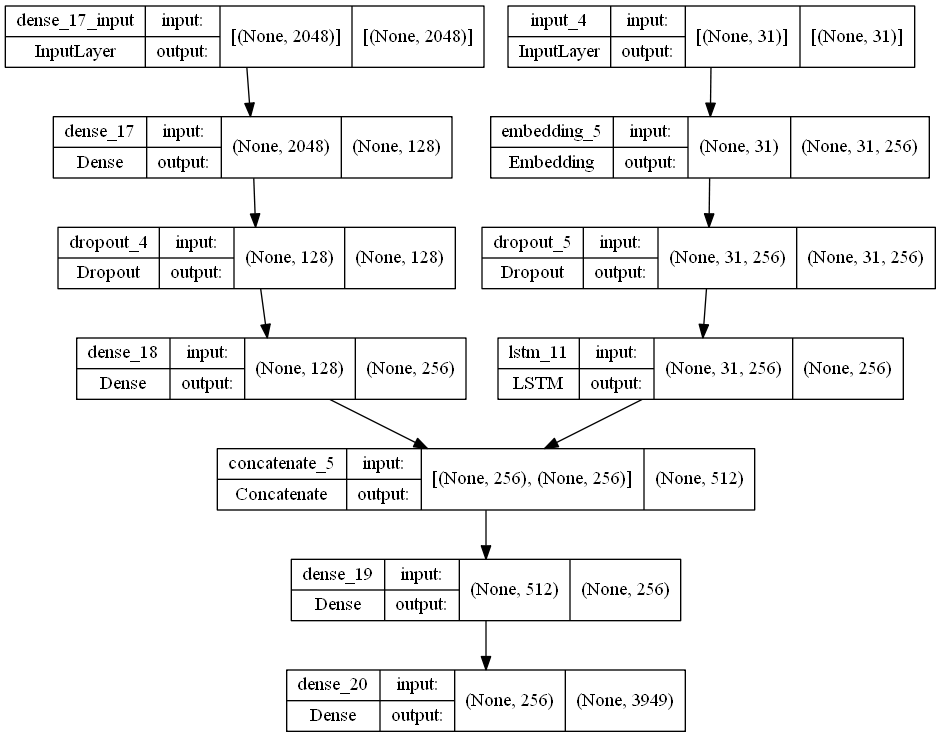

In [89]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model2 = Sequential()

image_model2.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model2.add(Dropout(0.5))
image_model2.add(Dense(256, activation='relu'))

image_model2.summary()

language_model2 = Sequential()

language_model2.add(Input(shape=(max_len,)))
language_model2.add(Embedding(vocab_size, 256, mask_zero=True))
language_model2.add(Dropout(0.5))
language_model2.add(LSTM(256))

language_model2.summary()

conca2 = Concatenate()([image_model2.output, language_model2.output])
x2 = Dense(256, activation='relu')(conca2)
out2 = Dense(vocab_size, activation='softmax')(x2)
model2 = Model(inputs=[image_model2.input, language_model2.input], outputs = out2)

#model.load_weights("../input/model_weights.h5")
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()
plot_model(model2, to_file='model2.png', show_shapes=True)

In [84]:
training2=model2.fit([X, y_in], y_out, batch_size=512,validation_data=([X_val, y_in_val], y_out_val), epochs=2,verbose = 2)

Epoch 1/2
122/122 - 106s - loss: 5.6418 - accuracy: 0.1212 - val_loss: 4.9875 - val_accuracy: 0.1547 - 106s/epoch - 870ms/step
Epoch 2/2
122/122 - 100s - loss: 4.7239 - accuracy: 0.1897 - val_loss: 4.2990 - val_accuracy: 0.2186 - 100s/epoch - 816ms/step


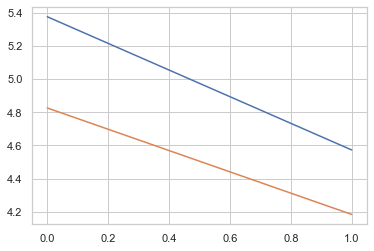

In [74]:
import matplotlib.pyplot as plt
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])

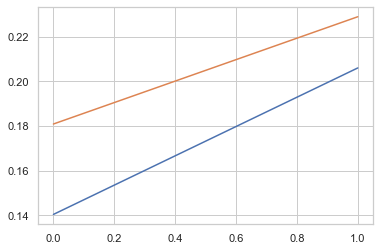

In [75]:
import matplotlib.pyplot as plt
plt.plot(training2.history['accuracy'])
plt.plot(training2.history['val_accuracy'])

In [76]:
inv_dict = {v:k for k, v in new_dict.items()}

In [77]:
model.save('model.h5')
model2.save('model2.h5')

In [78]:
model.save_weights('mine_model_weights.h5')
model2.save_weights('mine_model2_weights.h5')

In [79]:
np.save('vocab.npy', new_dict)

In [80]:
model = load_model('model.h5')

In [81]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    
    
    return test_img


(1, 2048)


0

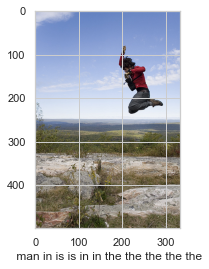

In [82]:
from gtts import gTTS
import os

for i in range(1):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    print(modele.predict(getImage(6999)).shape)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']
    
    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]
        if sampled_word == 'endofseq':
            break
        
        caption = caption + ' ' + sampled_word
              
       
        text_inp.append(sampled_word)
    
       
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption) 


mytext = caption
language = 'en'
myobj = gTTS(text=mytext, lang=language, slow=False)
myobj.save(f"{no}.mp3")
os.system(f"{no}.mp3")

In [86]:
from nltk.translate.bleu_score import corpus_bleu
from pickle import load

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load clean descriptions into memory
def load_clean_descriptions(filename):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# create list
		if image_id not in descriptions:
			descriptions[image_id] = list()
		# wrap description in tokens
		desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
		# store
		descriptions[image_id].append(desc)
	return descriptions



def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in clean.items():
		# generate description
		yhat = caption
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
    
clean = load_clean_descriptions('clean_descriptions.txt')
evaluate_model(model2, clean, images_features, captions_dict, max_len)

BLEU-1: 0.394400
BLEU-2: 0.217818
BLEU-3: 0.120238
BLEU-4: 0.033814
